In [1]:
#Last run date
import datetime
print (datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
import warnings
warnings.filterwarnings('ignore')

December 08, 2018 17:25:55


In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

# to make this notebook's output stable across runs
np.random.seed(42)

create_directory = True

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
if not(os.path.isdir(IMAGES_PATH)) and (create_directory):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300, transparent=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from itertools import permutations

Using TensorFlow backend.


In [4]:
#BK Import section
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from scipy.stats import expon, reciprocal, uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [5]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')
df_test = pd.read_csv('uoft_ai_class_1/final_project/test.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Correlation between columns

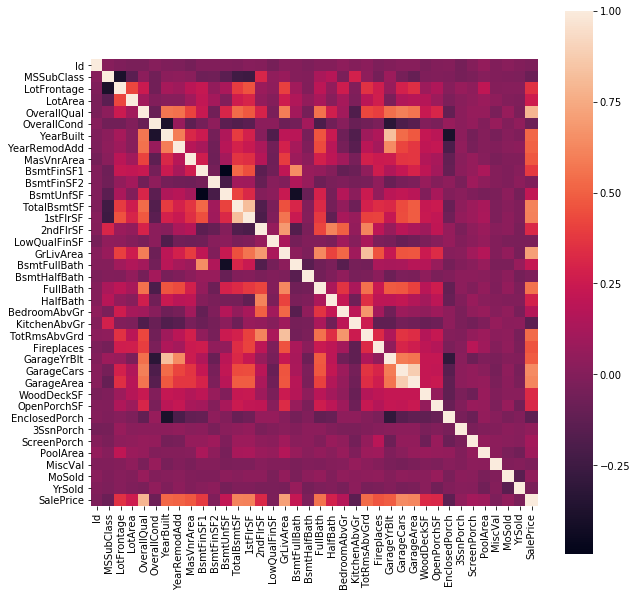

In [8]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

Distribution of sale prices

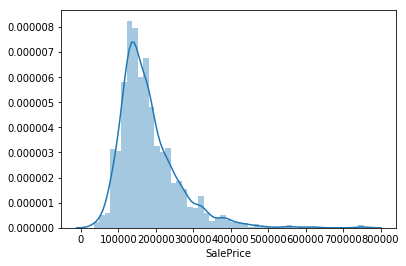

In [9]:
sns.distplot(df_train['SalePrice'])

sale price / year built chart

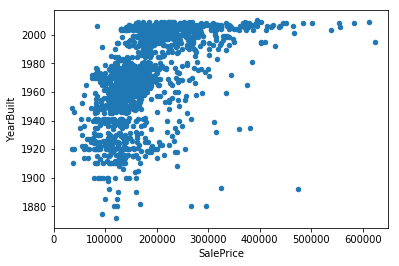

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
p = data.plot.scatter(x='SalePrice', y='YearBuilt', xlim=(0,650000))

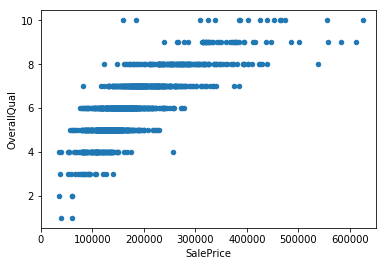

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
p = data.plot.scatter(x='SalePrice', y='OverallQual', xlim=(0,650000))

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
# New features
# The added features improved RMSE by 0.4% only
def PrepData (df):
    
    df['Years_after_Renov']=df['YrSold']-df['YearRemodAdd']
    df['Liv_area_over_LotArea']=df['GrLivArea']/df['LotArea']
    df['BedroomAbvGr'].replace(0, 1, inplace=True)
    df['Area_per_bedroom']=df['GrLivArea']/df['BedroomAbvGr']
    df['Qual_over_Cond']=df['OverallQual']/df['OverallCond']
    return df

In [14]:
# Data preparation

# remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

sale_price=df_train.pop('SalePrice')
df_train.drop(['Id'], inplace=True, axis=1)
#df_te_ID = df_test.drop(['Id'], inplace=True, axis=1)
df_te_ID = df_test.pop('Id')

df_train=PrepData(df_train)
df_test=PrepData(df_test)

numerical_features_indices = np.where(df_train.dtypes != np.object)[0]
categorical_features_indices = np.where(df_train.dtypes == np.object)[0]

In [15]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ('cat_imputer', SimpleImputer(strategy='most_frequent')), 
        ('cat_Encoder', OneHotEncoder(handle_unknown='ignore')), 
    ])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, numerical_features_indices),
        ('cat', cat_pipeline, categorical_features_indices),
    ])

df_prep = full_pipeline.fit_transform(df_train)
print(df_prep.shape)

df_test = full_pipeline.transform(df_test)
print(df_test.shape)

(1458, 291)
(1459, 291)


In [16]:
train_X, val_X, train_y, val_y = train_test_split(df_prep, sale_price, random_state = 42, test_size=0.2)

# Baseline estimators

In [17]:
# Compare different models with the same input data
names = ["Linear Regression", "SVR","Ridge","Lasso","ElasticNet","SGDRegressor","KNeighbors Regressor",
         "Decision Tree Regressor", "Random Forest Regressor"]

baseline_regressors = [
    LinearRegression(), 
    SVR(kernel="linear"),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SGDRegressor(random_state=42),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42)
]

# Create a dictionary for the regressor mapped to the rmse of baseline regressor
base_rmse = {}
# dict to store final models
final_models = {}
# final rmse values
final_rmse = {}
# final r2
final_r2 = {}

tuned_regressors = [
    LinearRegression(), 
    SVR(kernel="linear"),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SGDRegressor(random_state=42),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42)
]

In [18]:
def print_regressor_RMSE(X_tr, X_ts, y_tr, y_ts,regressors):
    for name, rgs in zip(names, regressors):
        rgs.fit(X_tr, y_tr)
        y_pred =rgs.predict(X_ts)
        rmse = np.sqrt(mean_squared_error(np.log(y_ts), np.log(y_pred))) 
        base_rmse[name] = rmse
        r2=r2_score(np.log(y_ts), np.log(y_pred))
        print('RMSE for {0} model is {1}'.format(name,  rmse))
        print('r2 for {0} model is {1}'.format(name,  r2))

In [19]:
%%time
print_regressor_RMSE(train_X, val_X, train_y, val_y,baseline_regressors)

RMSE for Linear Regression model is 0.26639529827352754
r2 for Linear Regression model is 0.5790306293699823
RMSE for SVR model is 0.40208104657058086
r2 for SVR model is 0.04098678786500132
RMSE for Ridge model is 0.1458576461940676
r2 for Ridge model is 0.8738010363131901
RMSE for Lasso model is 0.2584453809570658
r2 for Lasso model is 0.6037813294576313
RMSE for ElasticNet model is 0.2290609220450218
r2 for ElasticNet model is 0.6887571408511414
RMSE for SGDRegressor model is 0.16523338058558712
r2 for SGDRegressor model is 0.8380455208126116
RMSE for KNeighbors Regressor model is 0.21635090793524026
r2 for KNeighbors Regressor model is 0.7223390333697959
RMSE for Decision Tree Regressor model is 0.20934907888211285
r2 for Decision Tree Regressor model is 0.7400202655549027
RMSE for Random Forest Regressor model is 0.15266543301399424
r2 for Random Forest Regressor model is 0.8617456467916048
Wall time: 4.27 s


Bar chart of base models

Saving figure barplot_base_models_report


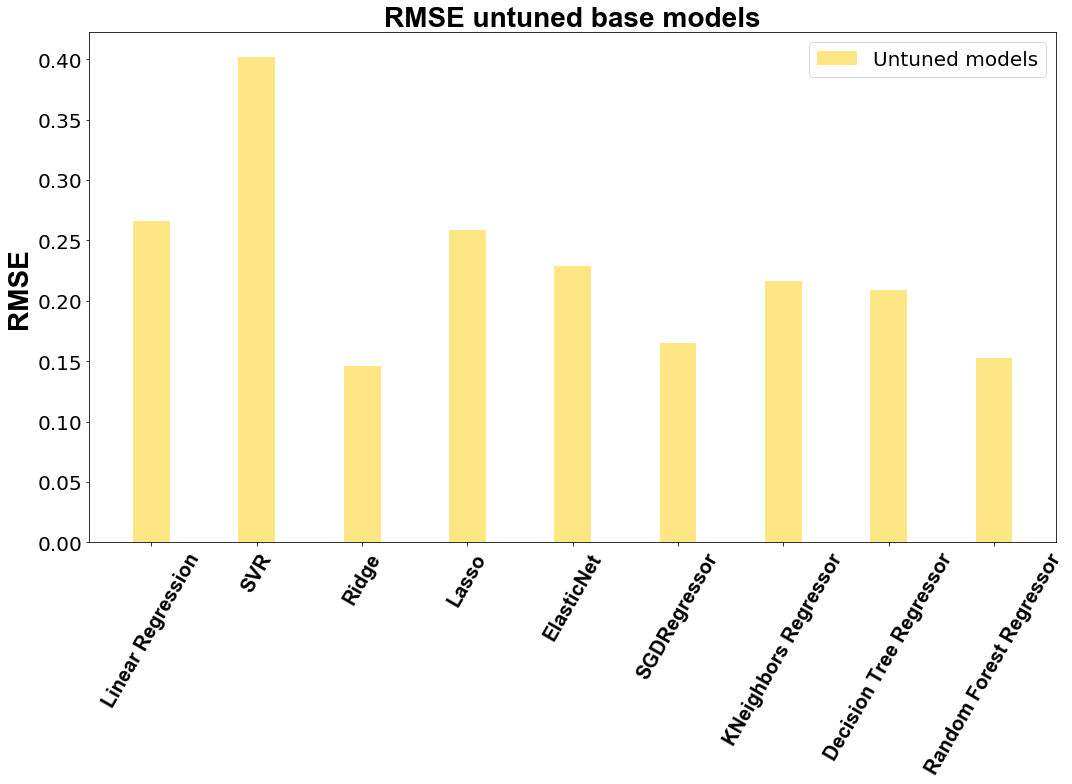

In [20]:
base_estimate = []
for name in names:
    base_estimate.append(base_rmse[name])

label_font = {'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 28,
        }

tick_font={'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 20,
        }
    
index = np.arange(len(names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15,11))
rects1 = ax.bar(index, base_estimate, bar_width,
                alpha=0.6, color='#ffd633',
                label='Untuned models',align="center")

ax.set_ylabel('RMSE', fontdict=label_font)
ax.set_title('RMSE untuned base models',fontdict=label_font)
ax.set_xticks(index)
ax.set_xticklabels(names, fontdict=tick_font, rotation=60)
ax.tick_params(axis='y',labelsize=20, colors='k')
ax.legend(loc=1, prop={'size': 20})

fig.tight_layout()
save_fig('barplot_base_models_report')
plt.show()

# Weak learning methods

In [21]:
# print the reults from the grid/random searchCV runs
def print_scores(estimator, display_threshold=40000):
    rbf_cvrs = estimator.cv_results_
    for mean_score, params in zip(rbf_cvrs["mean_test_score"], rbf_cvrs["params"]):
        if np.sqrt(-mean_score) < display_threshold:
            print(np.sqrt(-mean_score), params)

In [22]:
# evaluate using validation data
def validate_model(model_name, estimator, original_list=names, X=val_X, y=val_y):
    print('The best parameters for {0} model are:\n{1}\n'.format(model_name, grid_search.best_params_))
    final_models[model_name]=estimator.best_estimator_
    y_pred = final_models[model_name].predict(X)
    final_rmse[model_name] = np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))
    #r2=r2_score(np.log(y), np.log(y_pred))
    final_r2[model_name] = r2_score(y, y_pred)
    print('The RMSE for model is: {0:.5f}'.format(final_rmse[model_name]))
    print('The R2 for model is: {0:.5f}'.format(final_r2[model_name]))
    if model_name in original_list:
        print('The overall improvement with tuned hyper parameters is {0:.2%}'
              .format((base_rmse[model_name]-final_rmse[model_name])/base_rmse[model_name]))

## Linear regression optimization

In [23]:
%%time
#Hyper parameters optimization - Linear Regression
param_grid = {
    'fit_intercept': [True],
}

# oddly enough it seems that the best fit is the unchanged algorthim

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=10,scoring='neg_mean_squared_error',verbose=1,n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Wall time: 2.23 s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.0s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
print_scores(grid_search)

27901.235979577214 {'fit_intercept': True}


In [25]:
validate_model('Linear Regression', grid_search)

The best parameters for Linear Regression model are:
{'fit_intercept': True}

The RMSE for model is: 0.26639
The R2 for model is: 0.87793
The overall improvement with tuned hyper parameters is 0.00%


## SVR optimization

In [26]:
%%time
#Hyper parameters optimization - SVR
param_distribs = {
    'kernel': ['rbf'],
    'C': [113564],
    'gamma': [0.0007790692366582295],
}

# oddly enough it seems that the best fit is the unchanged algorthim

rand_search = RandomizedSearchCV(SVR(), param_distributions=param_distribs, n_iter=1, cv=5, 
                                 scoring='neg_mean_squared_error', verbose=1, n_jobs=2, random_state=42)
rand_search.fit(train_X, train_y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.2s finished


Wall time: 3.93 s


In [27]:
print_scores(rand_search)

In [28]:
validate_model('SVR', rand_search)

The best parameters for SVR model are:
{'fit_intercept': True}

The RMSE for model is: 0.19893
The R2 for model is: 0.74334
The overall improvement with tuned hyper parameters is 50.53%


## Ridge regression optimization

In [29]:
%%time
#Hyper parameters optimization - Ridge
param_grid = {
    'alpha': [1.0],
    'fit_intercept': [True],
    #'solver': ['cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'auto'],
    'solver': ['auto'],
}

# oddly enough it seems that the best fit is the unchanged algorthim

grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=3,scoring='neg_mean_squared_error',verbose=1,n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.1s finished


Wall time: 317 ms


In [30]:
print_scores(grid_search)

26945.318801854704 {'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}


In [31]:
validate_model('Ridge', grid_search)

The best parameters for Ridge model are:
{'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto'}

The RMSE for model is: 0.14586
The R2 for model is: 0.89722
The overall improvement with tuned hyper parameters is 0.00%


## Lasso regression optimization

In [32]:
%%time
#Hyper parameters optimization - Lasso
param_grid = {
    'alpha': [71],
    'max_iter': [100],
}

# oddly enough it seems that the best fit is the unchanged algorthim

grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=10,scoring='neg_mean_squared_error',verbose=1,n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Wall time: 816 ms


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.6s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
print_scores(grid_search)

25057.32619231869 {'alpha': 71, 'max_iter': 100}


In [34]:
validate_model('Lasso', grid_search)

The best parameters for Lasso model are:
{'alpha': 71, 'max_iter': 100}

The RMSE for model is: 0.13809
The R2 for model is: 0.90787
The overall improvement with tuned hyper parameters is 46.57%


## Elastic net optimization

In [35]:
%%time
#Hyper parameters optimization - Elastic Net
param_grid = {
    'alpha': [100],
    'l1_ratio': [1.0],
}

grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=8,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

Wall time: 905 ms


C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
print_scores(grid_search)

25038.513438627906 {'alpha': 100, 'l1_ratio': 1.0}


In [37]:
validate_model('ElasticNet', grid_search)

The best parameters for ElasticNet model are:
{'alpha': 100, 'l1_ratio': 1.0}

The RMSE for model is: 0.13824
The R2 for model is: 0.90916
The overall improvement with tuned hyper parameters is 39.65%


## SGDRegressor optimization - no regularization

In [38]:
%%time
#Hyper parameters optimization - SGDRegressor
param_grid = {
    'eta0': np.linspace(0.001, 0.1, num=20),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'max_iter': [50],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'power_t':[0.5],
    'penalty': ['none']
}

grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, verbose=1, cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 592 tasks      | elapsed:    4.5s


Wall time: 7.88 s


[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed:    7.7s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
print_scores(grid_search, display_threshold=28000)

27581.346292320493 {'eta0': 0.001, 'learning_rate': 'constant', 'loss': 'squared_loss', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}
27023.755983272356 {'eta0': 0.001, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}
27581.346292320493 {'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'squared_loss', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}
27023.755983272356 {'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'squared_epsilon_insensitive', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}
27646.574567675216 {'eta0': 0.006210526315789474, 'learning_rate': 'constant', 'loss': 'squared_loss', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}
27646.574567675216 {'eta0': 0.006210526315789474, 'learning_rate': 'adaptive', 'loss': 'squared_loss', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}


In [40]:
validate_model('SGDRegressor', grid_search)

The best parameters for SGDRegressor model are:
{'eta0': 0.001, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'max_iter': 50, 'penalty': 'none', 'power_t': 0.5}

The RMSE for model is: 0.14529
The R2 for model is: 0.89647
The overall improvement with tuned hyper parameters is 12.07%


## SGDRegressor Optimization - with regularization
commented out because it runs 72000 fits with no performance increase.

In [41]:
# %%time
# #Hyper parameters optimization - SGDRegressor
# param_grid = [
#     {'eta0': np.linspace(0.001, 0.1, num=20),
#     'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'max_iter': [50],
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'power_t':[0.5],
#     'penalty': ['l2','l1','elasticnet'],
#     'l1_ratio': np.linspace(0, 1, num=5),
#     'alpha': np.linspace(0.0001, 0.1, num=5),
#     }
# ]

# grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, verbose=1, cv=3,scoring='neg_mean_squared_error', n_jobs=2)
# grid_search.fit(train_X, train_y)

In [42]:
# print_scores(grid_search)

In [43]:
# validate_model('SGDRegressor', grid_search)

## KNeighborsRegressor optimization

In [44]:
%%time
#Hyper parameters optimization - KNeighbors Regressor
param_grid = {
    'n_neighbors': np.arange(3,8),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, verbose=1, cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s


Wall time: 8.44 s


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    8.3s finished


In [45]:
print_scores(grid_search)

In [46]:
validate_model('KNeighbors Regressor', grid_search)

The best parameters for KNeighbors Regressor model are:
{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

The RMSE for model is: 0.20128
The R2 for model is: 0.78280
The overall improvement with tuned hyper parameters is 6.96%


## Decision Tree Regressor optimization

In [47]:
# Print the most important features
def most_important_features(model, rgr_name, numResults=288, sort=True):
    important_features = []
    df = pd.DataFrame(df_prep.toarray()) 
    for name, score in zip(df.columns, model.feature_importances_):
        important_features.append((name, score))

    if sort:
        important_features.sort(key=lambda tup: tup[1], reverse=True)

    print('Top 10 features according to {}.\n'.format(rgr_name))
    print('Column # represents the column location in df_prep (with one_hot_encoding):\n')
    print('{:>12}{:>7}\n'.format('Column #', 'Score'))

    for name, score in important_features[0:numResults]:
        print('{:>12}: {:>8}'.format(name, score))

In [48]:
%%time
#Hyper parameters optimization - Decision Tree Regressor
param_grid = {
    'max_depth': np.append(np.arange(1,30+1,2), None),
    'min_samples_split': np.arange(2,30+1,2),
    'min_samples_leaf': [2],
    'max_features': ['auto'],
    #'max_leaf_nodes': np.append(np.arange(2,25), None),
    'max_leaf_nodes': [None], # none is the best every time
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, verbose=1, cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:   11.6s


Wall time: 18 s


[Parallel(n_jobs=2)]: Done 720 out of 720 | elapsed:   17.8s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
print_scores(grid_search, display_threshold=38416)

In [50]:
validate_model('Decision Tree Regressor', grid_search)

The best parameters for Decision Tree Regressor model are:
{'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 18}

The RMSE for model is: 0.19671
The R2 for model is: 0.76758
The overall improvement with tuned hyper parameters is 6.04%


In [51]:
# Print the most important features according to decision tree analysis
most_important_features(final_models['Decision Tree Regressor'], 'Decision Tree Regressor', numResults=5, sort=True)

Top 10 features according to Decision Tree Regressor.

Column # represents the column location in df_prep (with one_hot_encoding):

    Column #  Score

           3: 0.604596065987653
          15: 0.1244743808398337
          11: 0.10841636759937566
          22: 0.03323722112412952
           8: 0.02160527773683868


## Random Forest Regressor optimization

### RandomSearchCV

In [52]:
# %%time
# # Hyperparameters optimization - Random Forest Regressor
# # Use RandomSearchCV
# # 38min 58s run time with the following params:

# param_dist = {
#      'n_estimators': np.arange(1500,2000+1),
#      'max_depth': np.arange(15,25+1),
#      'max_features': np.arange(20,100+1),
#      'min_samples_split': np.arange(5, 7+1), 
#      'min_samples_leaf': [2], 
# }

# rand_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, scoring='neg_mean_squared_error', 
#                                     n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=2)
# rand_search.fit(train_X, train_y)

In [53]:
# print_scores(rand_search)

In [54]:
# validate_model('Random Forest Regressor', rand_search)

# # --- results ----
# # The best parameters for Random Forest Regressor model are:
# # {'n_estimators': 1762, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 100, 'max_depth': 18}

# # The RMSE for Random Forest Regressor model is: 29175.04
# # The overall improvement with tuned hyper parameters is 12.10%

# # Labeled data mean = 178840, rmse/mean = 16.31%

### GridSearchCV

In [55]:
%%time
#Hyper parameters optimization - Random Forest Regressor
param_grid = {
    'n_estimators': [1000],
    'max_depth': [16],
    'max_features': [125],
    'min_samples_split': [2], 
    'min_samples_leaf': [2], 
    # 'max_leaf_nodes': np.arange(2, 100+1, 10) # does not help rmse_val
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, 
                           verbose=1, cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   29.8s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 1min 10s


In [56]:
print_scores(grid_search)

27430.12420759211 {'max_depth': 16, 'max_features': 125, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [57]:
validate_model('Random Forest Regressor', grid_search)

The best parameters for Random Forest Regressor model are:
{'max_depth': 16, 'max_features': 125, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}

The RMSE for model is: 0.14660
The R2 for model is: 0.90821
The overall improvement with tuned hyper parameters is 3.98%


In [82]:
most_important_features(final_models['Random Forest Regressor'], 'Random Forest Regressor', numResults=5, sort=False)

Top 10 features according to Random Forest Regressor.

Column # represents the column location in df_prep (with one_hot_encoding):

    Column #  Score

           0: 0.0021373686616664475
           1: 0.004687234820734588
           2: 0.013987717515192212
           3: 0.2812929454733062
           4: 0.002690059384876585


Saving figure rnd_frt_feature_importance_plot_report


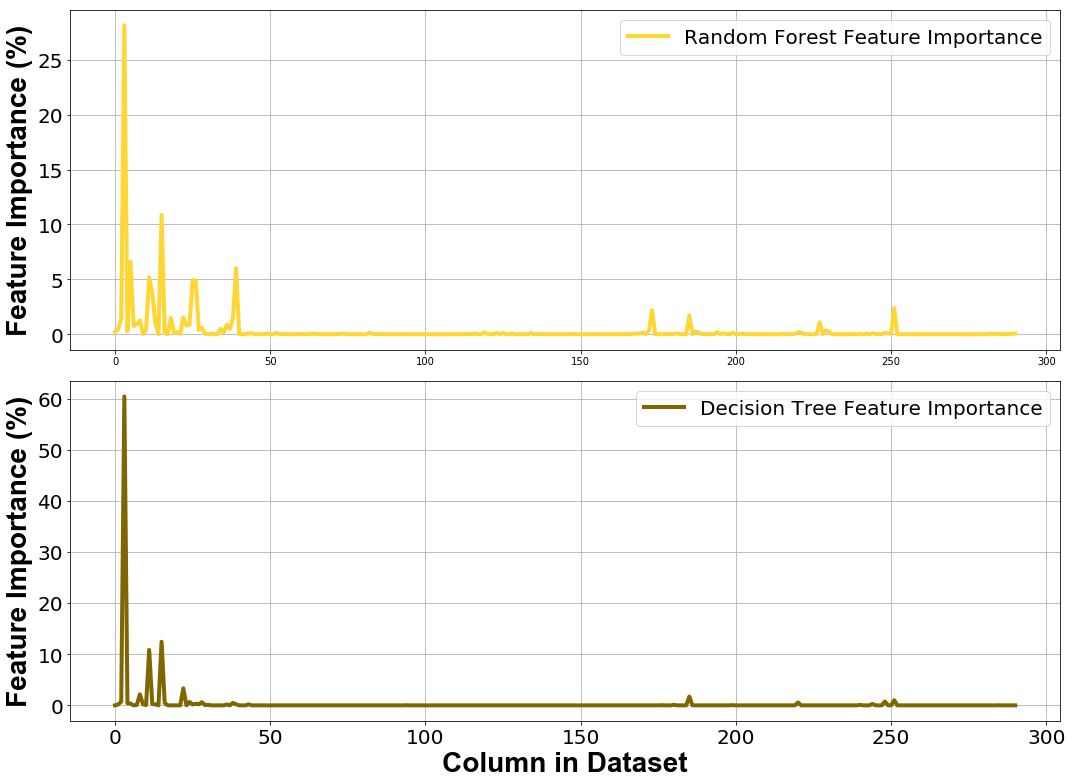

In [103]:
label_font = {'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 28,
        }

tick_font={'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 20,
        }

fig, ax = plt.subplots(2,1,figsize=(15,11))
ax[0].plot(final_models['Random Forest Regressor'].feature_importances_*100,
                color='#ffd633', linewidth=4,label='Random Forest Feature Importance')
ax[1].plot(final_models['Decision Tree Regressor'].feature_importances_*100,
                color='#806600', linewidth=4,label='Decision Tree Feature Importance')

ax[0].set_ylabel('Feature Importance (%)', fontdict=label_font)
ax[1].set_ylabel('Feature Importance (%)', fontdict=label_font)
ax[1].set_xlabel('Column in Dataset', fontdict=label_font)
ax[0].grid(True)
ax[1].grid(True)
ax[1].tick_params(axis='x',labelsize=20, colors='k')
ax[0].tick_params(axis='y',labelsize=20, colors='k')
ax[1].tick_params(axis='y',labelsize=20, colors='k')
ax[0].legend(loc=1, prop={'size': 20})
ax[1].legend(loc=1, prop={'size': 20})

fig.tight_layout()
save_fig('rnd_frt_feature_importance_plot_report')
plt.show()

## Model Visualization

Saving figure barplot_tuned_models_report


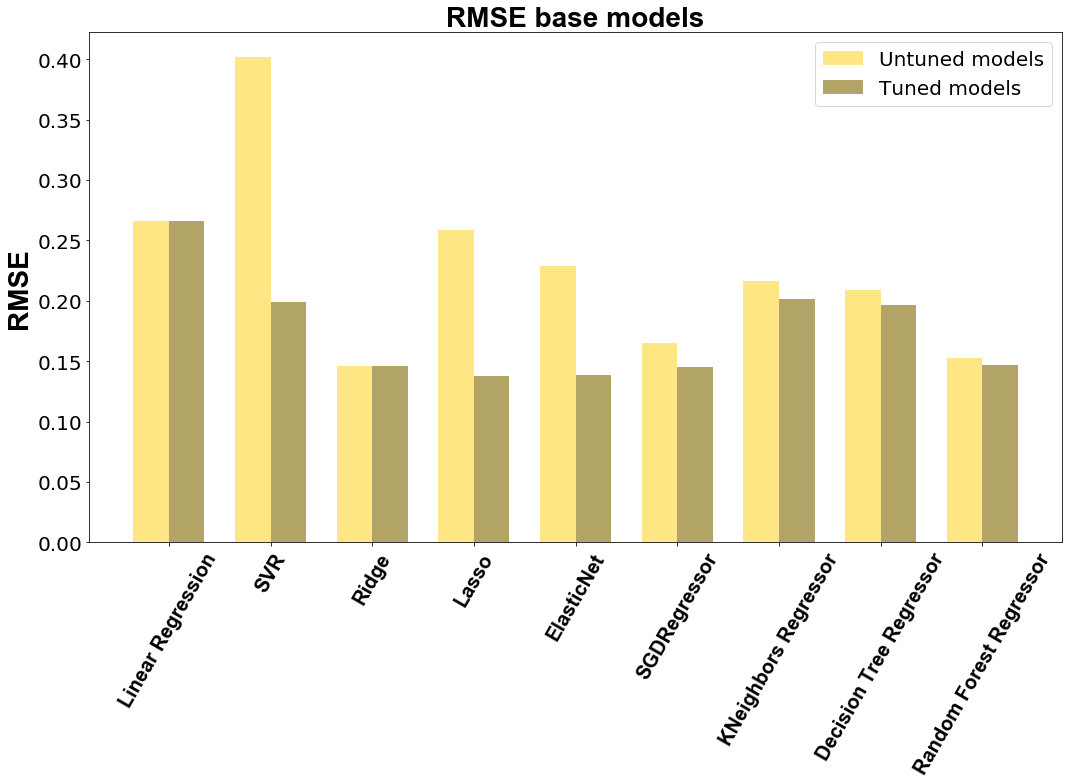

In [59]:
final_estimate = []
for name in names:
    final_estimate.append(final_rmse[name])

label_font = {'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 28,
        }

tick_font={'family': 'arial',
        'color':  'k',
        'weight': 'bold',
        'size': 20,
        }
    
index = np.arange(len(names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15,11))
rects1 = ax.bar(index, base_estimate, bar_width,
                alpha=0.6, color='#ffd633',
                label='Untuned models',align="center")
rects1 = ax.bar(index + bar_width, final_estimate, bar_width,
                alpha=0.6, color='#806600',
                label='Tuned models',align="center")

ax.set_ylabel('RMSE', fontdict=label_font)
ax.set_title('RMSE base models',fontdict=label_font)
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(names, fontdict=tick_font, rotation=60)
ax.tick_params(axis='y',labelsize=20, colors='k')
ax.legend(loc=1, prop={'size': 20})

fig.tight_layout()
save_fig('barplot_tuned_models_report')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X_sp, y_se, idx, name):
    X = X_sp.toarray()
    y = y_se.values
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X), 50):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

    plt.subplot(4,2, idx+1)
    plt.plot(np.sqrt(train_errors), color="#ff6600", linestyle='-', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), color="#ffd633", linestyle='-', linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=12)   
    plt.xlabel("Training set size/50 ("+name+")", fontsize=12) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure learning_curves


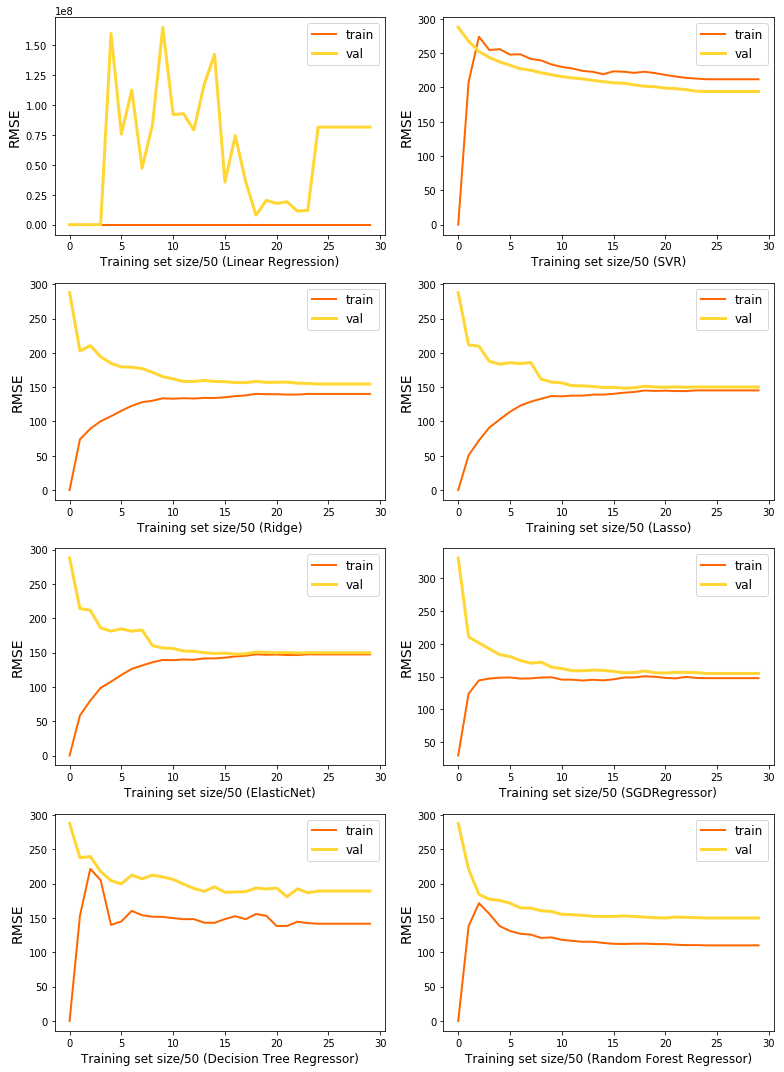

In [61]:
names_condensed = ["Linear Regression", "SVR","Ridge","Lasso","ElasticNet","SGDRegressor",
         "Decision Tree Regressor", "Random Forest Regressor"]

plt.subplots(4,2,figsize=(11, 15))

for idx, name in enumerate(names_condensed):
    plot_learning_curves(final_models[name], df_prep, sale_price, idx, name)
        
save_fig('learning_curves')
plt.show()

# Aggregate learning methods

## BaggingRegressor

In [62]:
%%time
#Hyper parameters optimization - BaggingRegressor
from sklearn.ensemble import BaggingRegressor

param_grid = {
    'max_samples': [1.0],
    'max_features': [1.0],
    'n_estimators': [7],
    'bootstrap': [True],
#     'base_estimator': [final_models['Lasso'], final_models['Linear Regression'], final_models['ElasticNet'],
#                       final_models['SVR'], final_models['Ridge'], final_models['SGDRegressor'], LinearRegression(),
#                       Lasso(random_state=42)],
    'base_estimator': [final_models['SVR']]
}

bag_rgr = BaggingRegressor(n_jobs=2, random_state=42)

grid_search = GridSearchCV(estimator=bag_rgr, param_grid=param_grid, verbose=1, 
                           cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    3.6s finished


Wall time: 4.83 s


In [63]:
print_scores(grid_search, display_threshold=33200)

In [64]:
validate_model('BaggingRegressor', grid_search)

The best parameters for BaggingRegressor model are:
{'base_estimator': SVR(C=113564, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.0007790692366582295, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False), 'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 7}

The RMSE for model is: 0.19855
The R2 for model is: 0.74745


## GradientBoostingRegressor

In [65]:
%%time
#Hyper parameters optimization - GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    #'loss': ['ls', 'lad', 'huber', 'quantile'],
    'learning_rate': [0.1],
    'n_estimators': [300],
    'subsample': [0.90], # less than 1.0 leads to lower variance and higher bias
    'min_samples_split': [50],
    'min_samples_leaf': [2],
    'max_depth': [6],
    'max_features': ['auto'],
    'max_leaf_nodes': [10],    
    'warm_start': [True]
}

gb_rgr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb_rgr, param_grid=param_grid, verbose=1, 
                           cv=3,scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    7.3s finished
C:\Users\Rob\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 12.1 s


In [66]:
print_scores(grid_search, display_threshold=26000)

24222.02467277612 {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 300, 'subsample': 0.9, 'warm_start': True}


In [67]:
validate_model('GradientBoostingRegressor', grid_search)

The best parameters for GradientBoostingRegressor model are:
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 300, 'subsample': 0.9, 'warm_start': True}

The RMSE for model is: 0.11468
The R2 for model is: 0.91971


## Stacking

In [106]:
names = ["Linear Regression", "SVR","Ridge","Lasso","ElasticNet","SGDRegressor","KNeighbors Regressor",
         "Decision Tree Regressor", "Random Forest Regressor"]

X_tr, X_hold, y_tr, y_hold = train_test_split(train_X, train_y, random_state=42, test_size=0.3)

In [109]:
class Layer(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
            
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)       
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
    
        return predictions
    
def Stacking(models, meta, X_tr=X_tr, y_tr=y_tr, X_hold=X_hold, val_X=val_X):
    layer1 = Layer(models)
    layer1.fit(X_tr, y_tr)
    predict_fit = layer1.predict(X_hold)

    meta_layer = Layer([meta])
    meta_layer.fit(predict_fit, y_hold)

    predict_test = layer1.predict(val_X)
    y_pred = meta_layer.predict(predict_test)

    rmse=np.sqrt(mean_squared_error(val_y, y_pred))
    rmse_log=np.sqrt(mean_squared_error(np.log(val_y), np.log(y_pred)))
    r2 = r2_score(val_y, y_pred)
    print("log_RMSE for basic stacking is: {}".format(rmse_log))
    print("RMSE for basic stacking is: {}".format(rmse))
    print('r2 for basic stacking is: {}'.format(r2))
    
    predict_te = layer1.predict(df_test)
    y_kaggle = meta_layer.predict(predict_te)
    
    return y_kaggle

In [110]:
models = [
    #final_models['Linear Regression'],
    final_models['GradientBoostingRegressor'],
    #final_models['Ridge'],
    final_models['SVR'],
    final_models['Lasso'],
    #final_models['ElasticNet'],
    #final_models['Decision Tree Regressor'],
    #final_models['KNeighbors Regressor'],
    final_models['Random Forest Regressor'],
]

meta = final_models['Ridge']
kaggle_prices = Stacking(models, meta)    

print(kaggle_prices.shape)

np.savetxt("stacking_submission.csv", kaggle_prices, delimiter=",")

log_RMSE for basic stacking is: 0.11449600290394017
RMSE for basic stacking is: 21311.443688773128
r2 for basic stacking is: 0.9177769642435228
(1459, 1)
